# **APS1017**
#**Project 2: Inventory Management**

###**Submission date: 18th June 2021.**

###Submitted by:

Alan Chacko: 1007532608

Asm Sajid: 1007202992

Poornitha Suresh: 1006575760

Mainak Das: 1006590887

---


##**SUMMARY**

This project aims to optimize an inventory system by finding an optimal (s, S) policy. The basic workflow of the project involves optimizing the inventory system by formulating it as a Markov decision process (MDP), where the inventory is controlled based on weekly review. A Python code was developed to comprehensively study, analyze and visualize MDP through graphical plots. To solve this MDP two methods have been used in this process.

First, MDP is formulated using a user-defined function called “MarkovDecisionProcess”. According to several cost parameters given in the problem statement, transition and reward are initialized for the “MarkovDecisionProcess” object.

The policy iteration algorithm is used as the first optimization method for the MDP. Users can use this technique to learn the optimal policy of the inventory system to maximize long-term reward. The user-defined function “BestPolicy(gamma)” with one input “gamma” value was used to run this algorithm. After optimizing the policy (s, S), the reward graph was plotted comparing the maximum value of the optimal policy as gamma changes. 

For Q-learning method, the optimal policy is determined by learning optimal q values for each state action pair. First an inventory environment was created to return current stock and the order quantity. Q-table was setup along with the number of steps and finally a reward graph was plotted to show how reward values change as the number of iterations increased to find optimal value for the best policy. Optimal policy graph was also shown to demonstrate the change in stock as the number of iterations increased.

The code is segmented into two sections where “Method 1” section includes all necessary user-defined functions to run the policy iteration algorithm and “Method 2” section contains all the user-defined functions as well as other codes to get the optimal policy graphs and results.


##**MARKOV DECISION PROCESS (MDP)**

Markov Decision Process is a mathematical framework for dynamic optimisation problems. It makes decision considering all the information available for an evolving situation in the environment. Here the information about the surrounding is given gradually, for example movement of a robot, inventor etc.

A basic MDP had 5 basic components as shown in the formulation, that is the states, actions, transition probabilities, reward functions and gamma.

For the inventory Problem, the states can be defined with the number of inventory units.

Policy: It is a collection of optimal solutions from the perspective of static optimization. The objective is to find the policy leading to the best result. A policy is denoted as a function ‘pi’ (symbol) mapping from where one is, to where one should go. A policy must cover all possible situations, and therefore, a policy should a mapping from all existing states to optimal action.

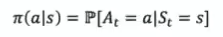

Optimization Equations: Value function can be understood as intuition is our decision making through multiple experiences. This Intuition can be captured in the form of a function called value function. Value function is defined as expectation of long-term return from an action and state. The optimality equation can be generated from the recursive equation which is the value function. This equation can be expresses as the Intuition when things are done optimally and is used in the policy improvement (equation shown along with policy improvement). [link text](https://)

We can solve the recursive equation using many methods including 
1. backward induction
2. value iteration
3. iteration
4. linear programming. 

We have used the policy iteration method for project 2. 

##**MDP FORMULATION**

We know that,

Market price = 10 dollar

Wholesale price, c = 4  dollars

Unit holding cost per year = 2 dollars/year = 52/2 dollars per week

Fixed setup cost, k = 100 dollars

Stockout penalty, p = 15 dollars

Maximum capacity of storage, M = 500

Lead time = 2 weeks 

Furthermore, we know that weekly demand follows a discrete uniform distribution between 0 and 10. Therefore, by solving for F(x),

F(x) = (x-a)/(b-a) = (x-0)/(10-0) = 0.1x

We also know that weekly demand lies between 0 and 10, therefore,

(Demand – 0)/(10 – 0) = F(x)

(Demand – 0)/(10 – 0) = 0.1x

Demand/10 = 0.1x

Demand = 1x

Max demand is 10, therefore demand = 10 for 1 week

p = 0.1

Discount factor ranges from 0 to 1


**Formulation of MDP:**

The 5 essential elements needed to represent the Markov Decision Process are given as (S, A, P, R, γ)

S - Finite set of states which is inventory level

S = {0, 1, ..., M}

A - Finite set of actions which is the number of units decided to buy

For a state s, a ∈ A(s) = {0, 1, ..., M − s}.

As we can not order more than the capacity of the store.

P – State transition probability matrix

P(s’|s,a) = P[St+1|St = s,At = a]

P(1,1) is the  probability of the system state to transition from 1 to 1

R – Reward function

Depending on the transition, either a reward or a penalty will be provided.

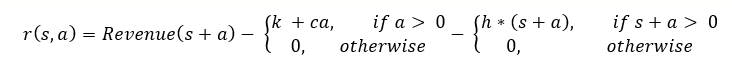

γ – Discount factor 

Considers that the dollar today is worth more than a dollar tomorrow





##**METHOD 1: POLICY ITERATION**

###Policy Iteration for the inventory problem:

The problem is defined as shown in formulation and we first calculate the revenues based on probably distribution of demand. This revenue is used in the reward calculation. Later transition probably is calculated based on s+a and s2, that is, when inventory is stocked to s+a, what is the probably that it becomes s2.

Policy Evaluation:

Given a policy we are computing the long-term consequence. We initialize a random policy and to compute the long-term consequences, we use the Bellman Equation as shown below,

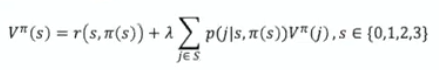

Using this formula, we find the V(s=0) to V(s=500)

Policy Improvement:

Using the the V values from previous step we compute pi(s) 

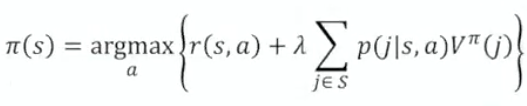

pi(s) takes the max of all the values generated using a. The a with the max value will be the new pi, this way, we can change the original policy to a better policy by evaluated by solving system if linear equations.  
By taking the difference between the policy pi and the policy improvement pi'. This will be looped until no better policy can be found (in our case, iterations are limited to 10,000).

The Policy Iteration Algorithm 

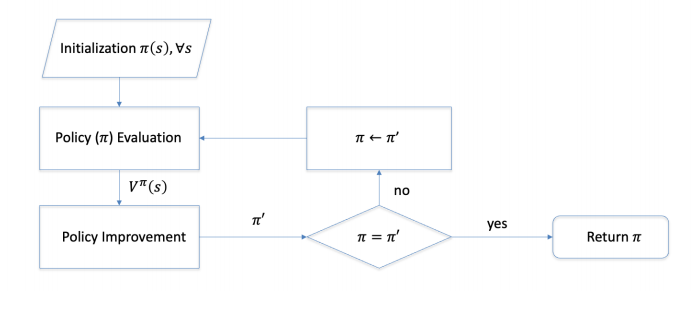


##**METHOD 2 : Q-LEARNING**

Q-learning is a reinforcement learning technique used for learning the optimal policy in a Markov decision process.

The goal of Q learning is to find the optimal policy by learning the optimal Q values for each state action pair. Once we have our optimal Q function( Q*) we can determine the optimal policy by applying a reinforcement learning algorithm to find the action that maximizes Q* for each state. The Q function for a given policy accepts a state and an action and returns the expected return from taking the given action in the given state . Making use of a table called a Q table to store the Q values for each state action pair the horizontal axis of the table  represents the actions and the vertical axis represents the states so the dimensions of the table are the number of actions by the number of states. Q(state(S), action(A)) returns the expected future reward of that action at that state.This function can be estimated using Q-learning, which iteratively updates Q(s,a) using the Bellman equation. 

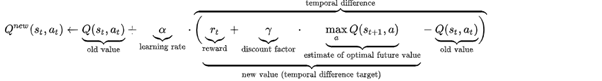


In short, q learning can be represent as shown below

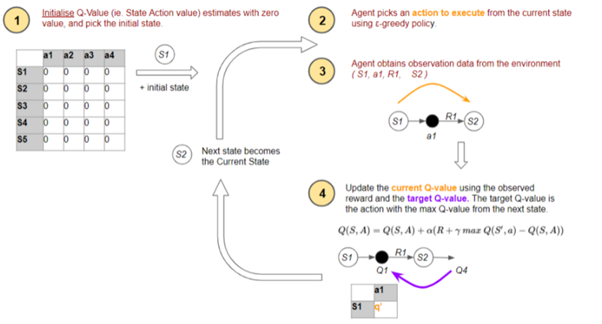

Step 1: Initialise q values estimates with zeroe values, and pick an initial state

Step 2: Agent picks an action to execute from the current state using epsilon greedy policy

Step 3: Agent obtains the observation data from the environment

Step 4: Update the current Q-value from the observed reward and the target Q-value.The target 	Q-value is action with the max Q-value from the next state using Bellamn equations 	above

 
it runs for 20000 iteration of the above 4 steps, with learning rate of 0.6 and discount rate 0.94


##**MAJOR FUNCTIONS IN THE CODE - QLEARNING**

***class inventory() :***  this class creates the inventory environment that encompasses the three function that are explained below

***def__init__(self) :*** This function initiates the environment with the variables(stock, sale price, stock price, first week order quantity, second week order quantity)

***def start() :*** This function returns the current stock and how much is ordered. This is
called at start of training because it returns the current state that the policy needs to pick the best action   

***def step() :*** This function takes an action, and returns the resulting state, and reward




##**MAJOR FUNCTIONS IN THE CODE - POLICY ITERATION**


**class MarkovDecisionProcess() :** This class is designed to formulate the Markov Decision process problem and is defined by the given states, actions, transition probabilities and reward function.


**def_init(self):** The __init(self) method is a reversed method of the MarkovDecision Process. Strictly speaking in terms of Object Oriented programming, the __init_(self) method basically a constructed of the above class which initializes the various states, actions, Transition probabilities and reward functions.


**def R() :** This method returns the reward function, given a particular state and action.

**def T() :** This method returns the Transition probabilities for a given state, given action and resultant state.

**def BestPolicy() :** This method performs policy evaluation as well as policy improvement simultaneously. It basically iterates through all possible policies compares them to the previous policy and selects the best policy as the given policy, if no improvement can be done.

##**LESSONS LEARNT**

**Learning Rate** – 
The leaning rate (α) in Q-learning can be set between 0 and 1. If the Q-values are never updated, it indicates a learning rate of 0. A learning rate of 0 means nothing is learned. For learning to occur quickly, a high learning rate such as 0.9 is required.

**Discount rate (gamma) –**
The discount rate aka gamma (γ) can also be set between 0 and 1 like the learning rate. This factor decides whether the reinforcement learning (RL) agent gives importance to future rewards or immediate rewards. A discount rate γ=0 indicates if RL agent will act myopic while only learning about different actions that provides immediate rewards. On the other hand, a discount rate γ=1 will learn about different actions by summing total future rewards.

**Greedy Policy –**
Greedy policy guarantees convergence despite of using function approximation to estimate different action values. 
Epsilon-Greedy balances between exploration and exploitation by randomly choosing between exploration and exploitation. This is an exploration strategy in RL, where ε (epsilon) refers to an exploratory action with probability exploiting mostly with a slim chance of exploring and 1-ε refers to a greedy action with probability.

Model for Q learning is easier than MDP. Unlike MDP, Q Learning does not need probability distribution. MDP, however depends on transition probabilities and is supposed to be more accurate


##**METHOD 1 - MDP POLICY ITERATION**

In [1]:
import numpy as np

States = [i for i in range(501)]
Actions = [0,1,2,3,4,5,6,7,8,9,10]
N_STATES = len(States)
N_ACTIONS = len(Actions)
#P = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # transition probability
#R = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # rewards

k = 100
c = 4
h = 2/52
mp = 10
penalty = 15


#To generate revenue for market (for use in Reward)
#u=s+a
p = 0.1
Ru0 = 0 
Ru1 = mp*((0*p)+(1*p*10))   #Revenue
Ru2 = mp*((0*p)+(1*p)+(2*p*(10-1)))
Ru3 = mp*((0*p)+(1*p)+(2*p)+(3*p*(10-2)))
Ru4 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p*(10-3)))
Ru5 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p*(10-4)))
Ru6 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p*(10-5)))
Ru7 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p)+(7*p*(10-6)))
Ru8 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p)+(7*p)+(8*p*(10-7)))
Ru9 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p)+(7*p)+(8*p)+(9*p*(10-8)))
Ru10 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p)+(7*p)+(8*p)+(9*p)+(10*p*(10-9)))
Ru11 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p)+(7*p)+(8*p)+(9*p)+(10*p))
Ru12 = mp*((0*p)+(1*p)+(2*p)+(3*p)+(4*p)+(5*p)+(6*p)+(7*p)+(8*p)+(9*p)+(10*p))

Ru0to10 = [Ru0,Ru1,Ru2,Ru3,Ru4,Ru5,Ru6,Ru7,Ru8,Ru9,Ru10]
Ru11to502 = [Ru11]*(5511-11)
Ru = Ru0to10+Ru11to502

U = []
for s in States:
  for a in Actions:
    u=s+a
    U.append(u)
    #print('a is',a)
    #print('s+a is',s+a)
    #print('----')
len(U)

#Defining Rewards using revenue
R = np.zeros((len(States), len(Actions)))   # rewards

for s in States:
  for a in Actions:
    if ((a>0) and (s+a>0)):
      R[s,a] = Ru[s+a] - (k + (c*a)) - (h*(s+a))
    elif ((a==0) and (s+a>0)):
      R[s,a] = Ru[s+a] - 0 - (h*(s+a))
    elif ((a==0) and (s+a==0)):
      R[s,a] = Ru[s+a] - 0 - 0 - penalty

#Transition probabbilities
#st+1 vs st+a or s2 vs s+a
P = np.zeros((len(U), len(Actions), len(States)))  # transition probability
for s in States:
  for a in Actions:
    for s2 in States:  #S list same as S2 list
      u=s+a
      if (((s+a) == 0) and (s2 == 0)):
        P[s+a,a,s2] = 1
      elif (s+a<s2):
        P[s+a,a,s2] = 0
      elif ((u-s2) == 1):
        P[s+a,a,s2] = 1
      elif ((u-s2) == 2):
        P[s+a,a,s2] = 0.9
      elif ((u-s2) == 3):
        P[s+a,a,s2] = 0.8
      elif ((u-s2) == 4):
        P[s+a,a,s2] = 0.7
      elif ((u-s2) == 5):
        P[s+a,a,s2] = 0.6
      elif ((u-s2) == 6):
        P[s+a,a,s2] = 0.5
      elif ((u-s2) == 7):
        P[s+a,a,s2] = 0.4
      elif ((u-s2) == 8):
        P[s+a,a,s2] = 0.3
      elif ((u-s2) == 9):
        P[s+a,a,s2] = 0.2
      elif ((u-s2) == 10):
        P[s+a,a,s2] = 0.1
      elif ((u == s2) and (s != 0)):
        P[s+a,a,s2] = 0.1
      elif ((u-s2) > 10):
        P[s+a,a,s2] = 0

In [2]:
class MarkovDecisionProcess:

    """A Markov Decision Process, defined by an states, actions, transition probabilities and reward function."""

    def __init__(self, T={}, R={}):
        #collect all nodes from the transition models
        self.States = [i for i in range(501)]
        self.Actions = [0,1,2,3,4,5,6,7,8,9,10]
        self.S2 = [i for i in range(501)]
        self.nb_States = len(self.States)
        self.nb_Action = len(self.Actions)
        #initialize transition
        self.T = T
        #initialize reward
        self.R = R

    def R(self, s):
        """return reward for this state."""
        return self.R[s,a]

    def T(self, s, a, s2):
        """for a state and an action, return a list of (probability, result-state) pairs."""
        return self.T[s+a][a][s2]

#Initialize the MarkovDecisionProcess object
mdp = MarkovDecisionProcess(T=P, R=R)


In [3]:
#Policy Iteration
def BestPolicy(gamma):
    """
    Solving the MDP by value iteration.
    returns utility values for states after convergence
    """
    states = mdp.States
    actions = mdp.Actions
    T = mdp.T
    R = mdp.R
    policy = np.random.randint(0,11,501) 
    gamma = gamma
    epsilon = 0.0001

    #initialize value
    V1 = {s: 0 for s in states}
    V1pi = {s: 0 for s in states}


    iteration = 0
    while True:
        Vpi = V1pi.copy()
        delta = 0
        #Policy Evaluation
        for s in states:
          #Bellman update, update the utility values
          V1[s] = R[s,policy[s]] + gamma*(sum([P[(s+policy[s]),policy[s],s1]*V1[s1] for s1 in range(N_STATES)]))

        #Policy Improvement
        for s in States:
          V1pii = []
          for a in Actions:
            V1piii = (R[s,a] + gamma*(sum([P[(s+a),a,s1]*V1[s1] for s1 in range(N_STATES)])))
            V1pii.append(V1piii)
          V1pi_ = max(V1pii)
          V1pi[s] = V1pi_ 
          #calculate maximum difference in value
          delta = max(delta, abs(V1pi[s] - Vpi[s]))

        iteration = iteration + 1

        #check for convergence, if values converged then return V
        if delta < epsilon:
          return Vpi
        elif iteration == 10000:
          return Vpi
  


In [4]:
V = BestPolicy(gamma=0.1)
print(V)

{0: -29.165528436329744, 1: -5.500504897645632, 2: -8.17043549269108, 3: -11.126832586913448, 4: -12.285588556998533, 5: -13.651502837020388, 6: -14.651162067510576, 7: -15.10150080415361, 8: -16.286365044642693, 9: -6.411519036454507, 10: -5.938776007488308, 11: -5.411369966641111, 12: 4.020547042646726, 13: -1.237770862041934, 14: -1.9427544997002002, 15: -3.5637745921987545, 16: -8.620095415405267, 17: -13.847783613243351, 18: -15.199483278262484, 19: -20.37879312480014, 20: -21.972798899396253, 21: -24.2402742700911, 22: -24.629175598904908, 23: -23.43450287642765, 24: -22.98865854013659, 25: -23.100202772287858, 26: -22.286279225256187, 27: -21.033194633251327, 28: -21.68836473084533, 29: -11.187242631629353, 30: -12.548153115463919, 31: -12.186121135563518, 32: -12.852947750869518, 33: -16.9352187398205, 34: -20.068255000783033, 35: -22.840446116415336, 36: -24.177191660205743, 37: -25.192516940830835, 38: -26.02358961553739, 39: -26.742866512593658, 40: -27.419776854800077, 41: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars


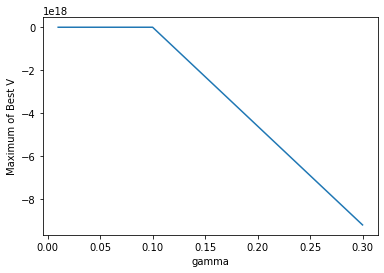

In [5]:
#########################  VISUALIZATION  ######################################

GammaRange = [0.01, 0.05, 0.1, 0.3]

Best_V = []
import matplotlib.pyplot as plot
for g in GammaRange:
  V = BestPolicy(gamma=g)
  data = list(V.items())
  an_array = (np.array(data)).astype(int)
  v = np.max(an_array[:,1:])
  Best_V.append(v)

# Plot the data
plot.plot(GammaRange, Best_V)
plot.xlabel("gamma")
plot.ylabel("Maximum of Best V")

# Show the plot
plot.show()


##**METHOD 2 - Q LEARNING**

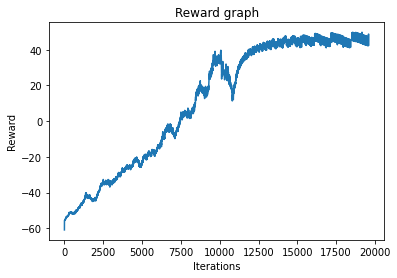

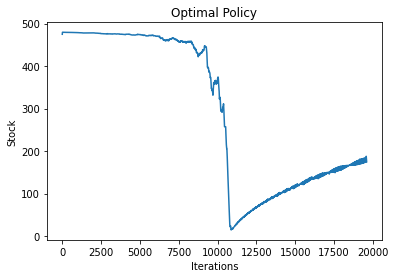


 Optimal policy converges around :  116


In [6]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math

#This is the inventory environment
class inventory():
       
    #initiates environment with the variables
    def __init__(self):
        self.stock = 0
        self.sale_price = 10
        self.stock_price = 4
        #keep track of what was ordered
        self.order_1 = 0
        self.order_2 = 0
        self.max = 500

    #Returns the current stock and how much is ordered.
    #This should be called at start of training because 
    #it returns the current state that the policy needs 
    #to pick the best action    
    def start(self):
        return [self.stock, self.order_2]

    #This takes an action, and returns the resulting state, and reward  
    def step(self, num_ordered):
        
        reward = 0
        
        # bassed on MDP formulation
        demand = 10
        
          
        if(self.stock + self.order_2 + self.order_1 + num_ordered > self.max):
            num_ordered = self.max - self.stock - self.order_2 - self.order_1 + demand

        #orders new stock. If has been ordered 2 weeks ago, arrives
        self.stock += self.order_2
        self.stock = np.clip(self.stock,0,500)
        self.order_2 = self.order_1
        self.order_1 = num_ordered
        self.order_1 = num_ordered
        if(num_ordered > 0):
            reward -= 100

        #if ordered stock, adjusts reward
        reward -= self.stock_price * num_ordered
         
        #sell stock and calculate stock left
        if(self.stock - demand < 0):
            reward += self.stock * self.sale_price
            self.stock = 0
        else:
            self.stock -= demand
            reward += demand * self.sale_price
        
        reward -= self.stock * 2/52
    
        #penalty for being out of stock
        if(self.stock == 0):
            reward += -15


        return [np.clip(self.stock + self.order_2,0,500), self.order_1], reward, num_ordered, demand
            
    
env = inventory()

#Q learning
#setting up the Q table
Q_Table = np.zeros([501,501,501])

#set up iteration parameter
number_steps = 20000

#discount rate for rewards
discount_rate = 0.94

#likelihood of picking a random action
epsilon = 1.0

#keep track of rewards
reward_list = list()

state = env.start()
Q_rews = Q_Table[state[0],state[1]]

#learning rate
lr = 0.6

action_list = list() 
stock_list = list()

#This is the training loop
for step in range(number_steps):
    
    stock_list.append(env.stock)

    #picks random action if randdom number is less than epsilon
    if(randint(0,100) < epsilon * 100):
        action = randint(0,500)

    #otherwise it follows the policy
    else:
        action = np.argmax(Q_rews)
    
    state_0 = state
    Q_rews_0 = Q_rews
    
    state, reward, action, demand = env.step(action)
    
    reward_list.append(reward)
    epsilon -= 0.00009
    
    Q_rews = Q_Table[state[0],state[1]]
    
    #update Q_Table
    Q_Table[state_0[0],state_0[1],action] = lr * (reward + discount_rate *\
        np.max(Q_rews)) + (1-lr) * Q_rews_0[action]
       

#########################  VISUALIZATION  ######################################

#plots average reward graph
plt.plot([np.mean(reward_list[i:i+400]) for i in range(len(reward_list)-400)])
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Reward graph")
plt.show()
print("\n")
#second plot is how much stock is held
plt.plot([np.mean(stock_list[i:i+400]) for i in range(len(reward_list)-400)])
plt.xlabel("Iterations")
plt.ylabel("Stock")
plt.title("Optimal Policy")
plt.show()    
# print(demand)

print("\n Optimal policy converges around : ",math.ceil(np.mean(stock_list[11000:20000])))


##Visualization of Solutions



### Policy Iteration

gamma vs best policy

The gamma values have an effect on the best policy evaluation. We find that decreasing the gamma values gives us a policy closer to the demand range which is in between 0 and 10. It is seen that, for the given set of gamma values, the best policy will be best expected for gamma in the range 0 to 0.1 (0 excluded). The best policy graph vs gamma plateaus around the 0.1 mark.

### Q-Learning

For Q-learning, we have plotted two graphs, one we call the reward graph and the other the optimal policy graph.

In the reward graph, the number of iterations is plotted on the x axis and the reward values on the y axis. From this graph, we can clearly see that the policy after training plateaus at around 12500 iterations. As the number of iterations increases, we can see that the reward values also increase to a point, and then it stabilizes or plateaus.

In the Optimal policy graph, the number of iterations is plotted on the x axis and the stock on the y axis. From this, we can see that after 12500 iterations, the policy converges at around 115

##**REFERENCES**

1. [About Q learning](https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56)

2. [Beginners guide to Q learning](https://towardsdatascience.com/a-beginners-guide-to-q-learning-c3e2a30a653c6)

2. [Visually-Qlearning](https://towardsdatascience.com/reinforcement-learning-explained-visually-part-4-q-learning-step-by-step-b65efb731d3e)

2. [A Grid Example](https://www.analyticsvidhya.com/blog/2021/04/q-learning-algorithm-with-step-by-step-implementation-using-python/)

2. [Gym Environmennt Example](https://www.geeksforgeeks.org/q-learning-in-python/)

2. [Parking Example](https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/)

2. [Guide to Reinforcement Learning in inventory managmment](http://essay.utwente.nl/85432/1/Geevers_MA_BMS.pdf)

2. [Notes on MDP](https://web.mit.edu/6.246/www/notes/L3-notes.pdf)




